# Upload the dataset

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Import necessary libraries for the machine learning project.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing, model_selection, linear_model, neighbors, svm, metrics, tree


# Read and apply necessary preprocessing steps on the dataset

In [ ]:
# read the csv file 
df = pd.read_csv('house.csv')

In [ ]:
# print the head of the data 
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
# print the describe of the dataframe 
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,8830.000000,8829.000000,8829.000000,8829.000000,8739.000000,8829.000000,8829.000000,8829.000000,8829.000000
mean,-119.315862,35.347086,32.475932,2355.891041,506.300606,1383.415449,475.699173,3.672058,201134.802696
std,1.752855,1.937944,11.609714,1839.273553,377.695680,993.251026,351.079667,1.887491,112729.109291
min,-124.350000,32.670000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-120.350000,33.990000,25.000000,1347.000000,285.000000,790.000000,272.000000,2.367400,118100.000000
50%,-118.370000,34.140000,34.000000,1928.000000,411.000000,1142.000000,388.000000,3.281300,175000.000000
75%,-118.190000,37.540000,41.000000,2807.000000,609.000000,1688.000000,570.000000,4.493400,250000.000000
max,-114.550000,41.950000,52.000000,32054.000000,5290.000000,15507.000000,5050.000000,15.000100,500001.000000


In [ ]:
# print the info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8830 entries, 0 to 8829
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           8830 non-null   float64
 1   latitude            8829 non-null   float64
 2   housing_median_age  8829 non-null   float64
 3   total_rooms         8829 non-null   float64
 4   total_bedrooms      8739 non-null   float64
 5   population          8829 non-null   float64
 6   households          8829 non-null   float64
 7   median_income       8829 non-null   float64
 8   median_house_value  8829 non-null   float64
 9   ocean_proximity     8829 non-null   object 
dtypes: float64(9), object(1)
memory usage: 690.0+ KB


In [ ]:
# drop the longitude, latitude columns 
df.drop(['longitude', 'latitude'], axis=1, inplace=True)

In [ ]:
# print the info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8829 entries, 0 to 8828
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  8829 non-null   float64
 1   total_rooms         8829 non-null   float64
 2   total_bedrooms      8829 non-null   float64
 3   population          8829 non-null   float64
 4   households          8829 non-null   float64
 5   median_income       8829 non-null   float64
 6   median_house_value  8829 non-null   float64
 7   ocean_proximity     8829 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 620.8 KB


In [ ]:
# count how many nan values are in the dataframe
df.isnull().sum()

housing_median_age     1
total_rooms            1
total_bedrooms        91
population             1
households             1
median_income          1
median_house_value     1
ocean_proximity        1
dtype: int64

In [ ]:
# fill the nan values with the mean of the 
df.housing_median_age.fillna(value=df.housing_median_age.mean(), inplace=True)
df.total_rooms.fillna(value=df.total_rooms.mean(), inplace=True)
df.total_bedrooms.fillna(value=df.total_bedrooms.mean(), inplace=True) 
df.population.fillna(value=df.population.mean(), inplace=True)
df.households.fillna(value=df.households.mean(), inplace=True)
df.median_income.fillna(value=df.median_income.mean(), inplace=True)
df.median_house_value.fillna(value=df.median_house_value.mean(), inplace=True)
df.ocean_proximity.dropna(inplace=True)

In [ ]:
# count how many nan values are in the dataframe
df.isnull().sum()

housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [ ]:
# convert the words to numerical values 
# create function that return two dictionary of word to index and the other index word 
def string_to_numerics(column):
  word_index = {}
  index_word = {}
  for i,v in enumerate(column.unique()):
    word_index[v] = i
    index_word[i] = v

  # return word to index & index to word dictionaries 
  return word_index, index_word


In [ ]:
#convert the string to numeric
word_index, index_word = string_to_numerics(df.ocean_proximity)
df.ocean_proximity.replace(word_index, inplace=True)

In [ ]:
# print the dataframe
df

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0
...,...,...,...,...,...,...,...,...
8824,36.0,1616.0,465.0,773.0,429.0,2.6000,313600.0,1
8825,33.0,3463.0,1170.0,1845.0,1134.0,2.0205,243800.0,1
8826,30.0,2353.0,728.0,1365.0,718.0,2.0702,283300.0,1
8827,37.0,7097.0,2010.0,2913.0,1939.0,2.8750,300000.0,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4d22fb7c10>,
      dtype=object)

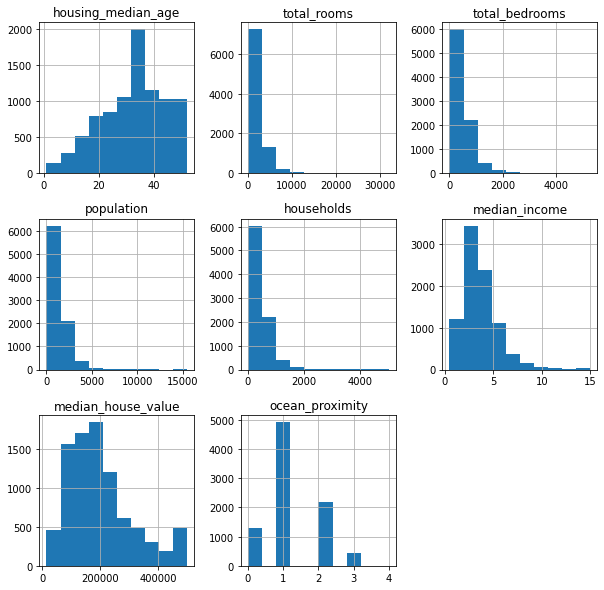

In [ ]:
# plot the hist for the dataframe 
df.hist(figsize=(10,10))

# Split the dataset to 20% for testing and 80% for training.

In [ ]:
# split the dataset to x and y 
x= np.asarray(df[['ocean_proximity', 'median_income', 'households', 'population', 'total_bedrooms', 'total_rooms', 'housing_median_age']])
y = np.asarray(df[['median_house_value']].astype(int))

In [ ]:
x

array([[0.0000e+00, 8.3252e+00, 1.2600e+02, ..., 1.2900e+02, 8.8000e+02,
        4.1000e+01],
       [0.0000e+00, 8.3014e+00, 1.1380e+03, ..., 1.1060e+03, 7.0990e+03,
        2.1000e+01],
       [0.0000e+00, 7.2574e+00, 1.7700e+02, ..., 1.9000e+02, 1.4670e+03,
        5.2000e+01],
       ...,
       [1.0000e+00, 2.0702e+00, 7.1800e+02, ..., 7.2800e+02, 2.3530e+03,
        3.0000e+01],
       [1.0000e+00, 2.8750e+00, 1.9390e+03, ..., 2.0100e+03, 7.0970e+03,
        3.7000e+01],
       [1.0000e+00, 2.5812e+00, 4.6800e+02, ..., 4.5800e+02, 1.3900e+03,
        3.6000e+01]])

In [ ]:
# normalize the values of x and y
x_norm = preprocessing.StandardScaler().fit(x).transform(x)
y_minmax = preprocessing.MinMaxScaler().fit(y.reshape(-1,1)).transform(y.reshape(-1,1))

(array([[1.287e+03, 4.919e+03, 2.618e+03, 5.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [1.568e+03, 6.237e+03, 8.730e+02, 1.120e+02, 3.900e+01, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [8.970e+02, 7.049e+03, 7.150e+02, 1.190e+02, 3.300e+01, 1.000e+01,
         4.000e+00, 1.000e+00, 1.000e+00, 0.000e+00],
        [1.010e+03, 6.880e+03, 7.770e+02, 1.170e+02, 3.100e+01, 1.000e+01,
         1.000e+00, 1.000e+00, 2.000e+00, 0.000e+00],
        [8.700e+02, 7.086e+03, 6.990e+02, 1.230e+02, 3.600e+01, 9.000e+00,
         4.000e+00, 1.000e+00, 1.000e+00, 0.000e+00],
        [7.610e+02, 7.274e+03, 6.330e+02, 1.130e+02, 2.500e+01, 1.400e+01,
         6.000e+00, 0.000e+00, 2.000e+00, 1.000e+00],
        [1.875e+03, 5.581e+03, 1.373e+03, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]]),
 array([-2.71132544, -0.8254363 ,  1.06045283,  2.94634197,  4.83223111,
         6.71812024,  

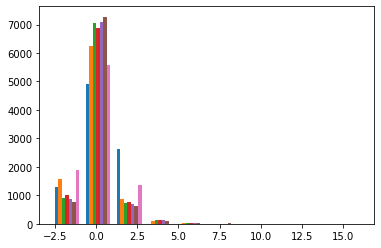

In [ ]:
# plot the hist for the normalized x 
plt.hist(x_norm)

In [ ]:
# split the data to train and test 
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_norm, y_minmax, test_size=0.20, random_state=42)

# Create and train 4 Machine Learning models.


Linear Regression

In [ ]:
model_linear = linear_model.LinearRegression()
model_linear.fit(x_train, y_train)

LinearRegression()

KNN

In [ ]:
model_knn = neighbors.KNeighborsRegressor(n_neighbors=9)
model_knn.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=9)

SVM

In [ ]:
model_svm = svm.SVR(kernel='rbf', C=2)
model_svm.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=2)

Tree

In [ ]:
model_tree = tree.DecisionTreeRegressor(max_depth=4)
model_tree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=4)

# Use the right evaluation metrics to choose the best model.

In [ ]:
y_linear = model_linear.predict(x_test)

print(f"MSE: {metrics.mean_squared_error(y_test, y_linear)}")
print(f"r2: {metrics.r2_score(y_test, y_linear)}")


MSE: 0.022108503237891826
r2: 0.5961778246967557


In [ ]:
y_knn = model_knn.predict(x_test)

print(f"MSE: {metrics.mean_squared_error(y_test, y_knn)}")
print(f"r2: {metrics.r2_score(y_test, y_knn)}")


MSE: 0.016017783229795808
r2: 0.7074276807529027


In [ ]:
y_svm = model_svm.predict(x_test)

print(f"MSE: {metrics.mean_squared_error(y_test, y_svm)}")
print(f"r2: {metrics.r2_score(y_test, y_svm)}")


MSE: 0.013190783376431363
r2: 0.7590641582694351


In [ ]:
y_tree = model_tree.predict(x_test)

print(f"MSE: {metrics.mean_squared_error(y_test, y_tree)}")
print(f"r2: {metrics.r2_score(y_test, y_tree)}")


MSE: 0.02298397262630938
r2: 0.5801869659290643


The Best Model is : SVM - SVR                                 
because it's offer minimum MSE and the maximum r2 score.